# 1. Organizing Images

In [1]:
#PyTorch Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets
from torchvision import transforms 
from torchvision.transforms import ToTensor 

print(torch.__version__)
print(torchvision.__version__)

1.13.1+cpu
0.14.1+cpu


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
device = 'cpu'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from random import choice 

import os
os.chdir('C:/Users/louis/Desktop/03MyProjects/KTX_Image_Classification')
import glob
from skimage.io import imread

import warnings
warnings.filterwarnings("ignore")

In [5]:
#0 means KTX-1
#1 means KTX-EUM
#2 means KTX-Sancheon
#3 means SRT
hsr0 = []
hsr1 = []
hsr2 = []
hsr3 = []

In [6]:
for classes in os.listdir('trains'):
    route = 'trains/'+classes+'/'
    for path in os.listdir(route):
        if classes == 'ktx_1':
            hsr0.append(route+path)
        elif classes == 'ktx_eum':
            hsr1.append(route+path)
        elif classes == 'ktx_sancheon':
            hsr2.append(route+path)
        elif classes == 'srt':
            hsr3.append(route+path)

In [7]:
print('KTX-1:',len(hsr0))
print('KTX-EUM:',len(hsr1))
print('KTX-Sancheon:',len(hsr2))
print('SRT:',len(hsr3))

KTX-1: 10
KTX-EUM: 10
KTX-Sancheon: 10
SRT: 10


# 2. Exploratory Data Analysis

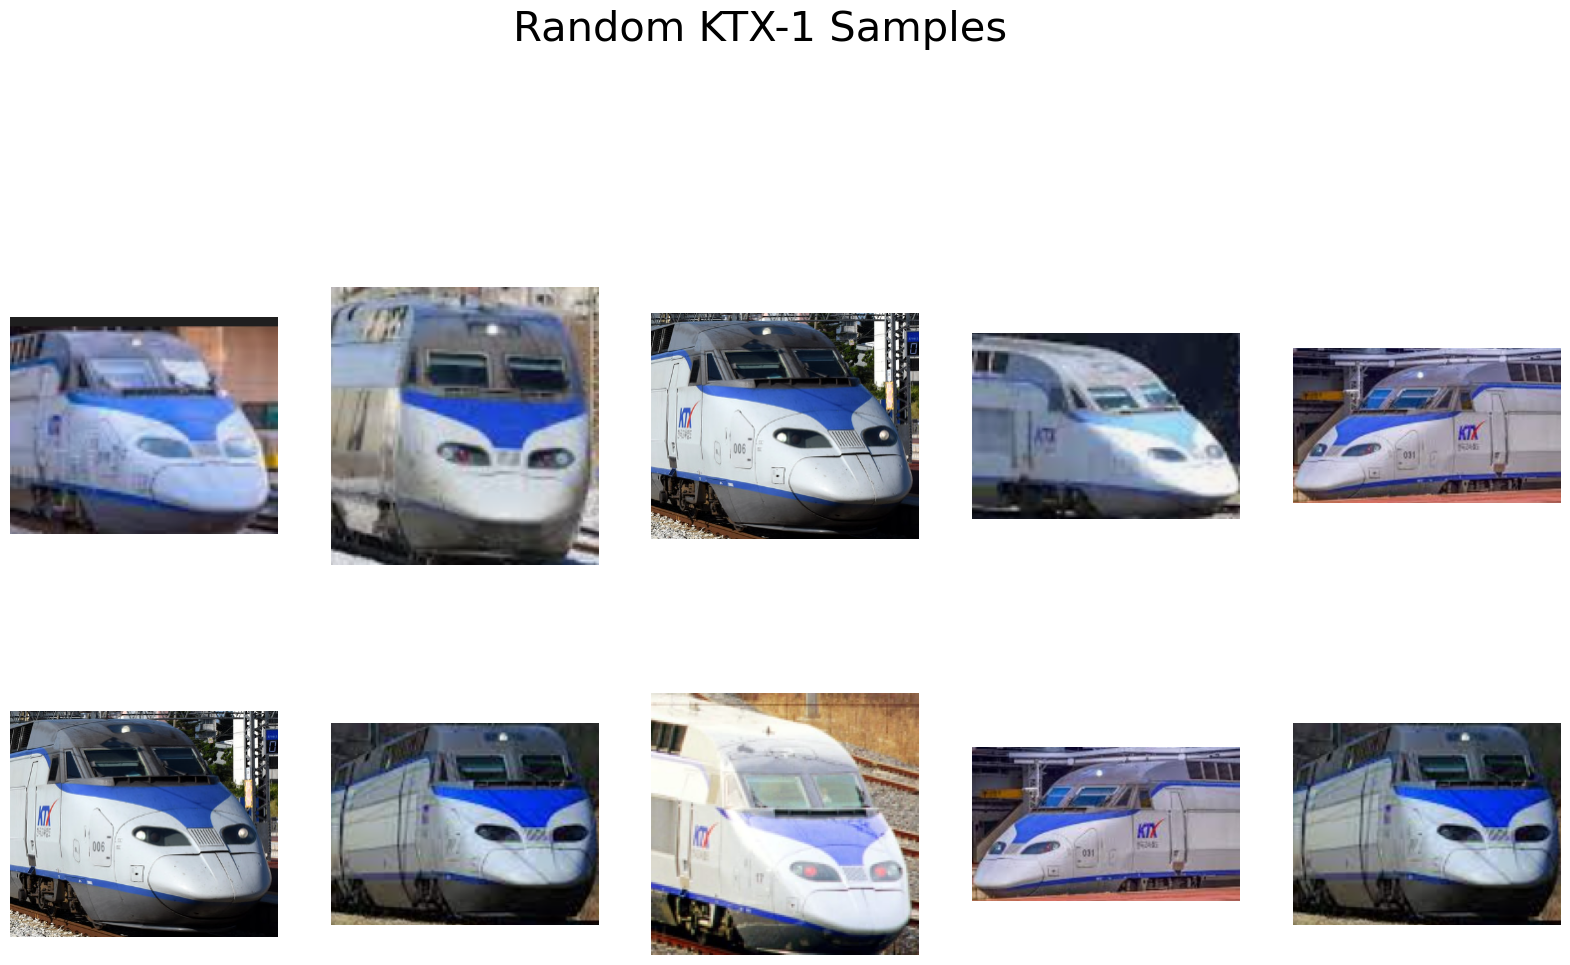

In [8]:
from random import choice 
fig,axes = plt.subplots(figsize=(20,25))

random_image = [choice(hsr0)for x in range(0,11)] 

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    plt.axis(False)
    axes =plt.subplot(5,5,i+1)

fig.delaxes(axes)
fig.suptitle('Random KTX-1 Samples',fontsize=30)
plt.show() 

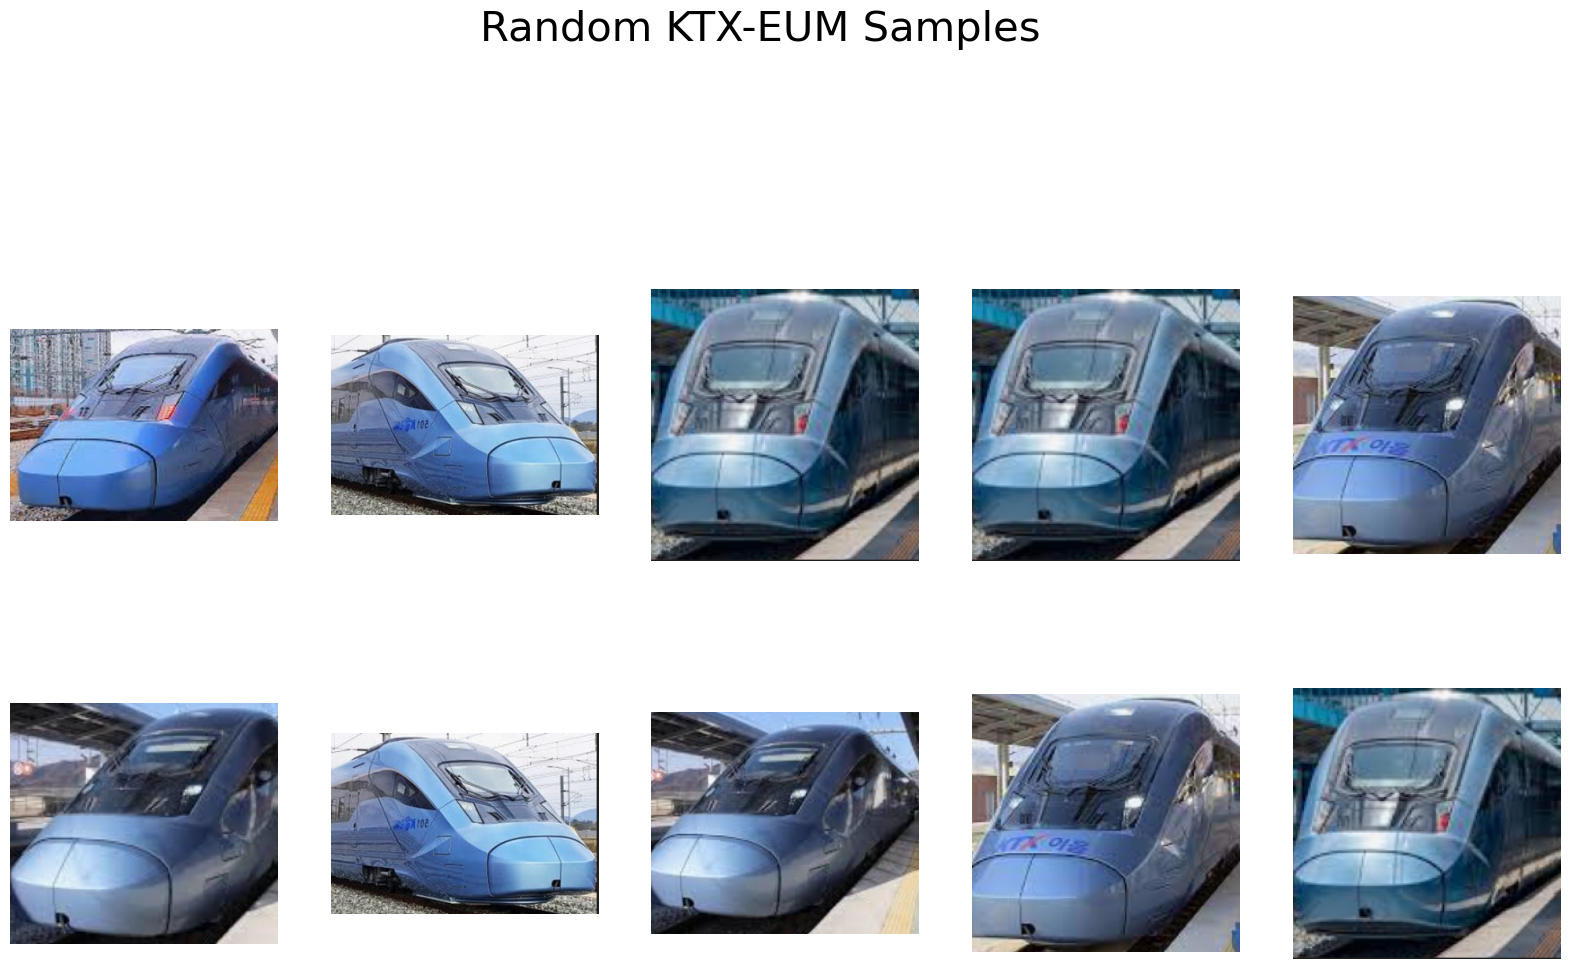

In [9]:
fig,axes = plt.subplots(figsize=(20,25))
  
random_image = [choice(hsr1)for x in range(0,11)] 

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    plt.axis(False)
    axes =plt.subplot(5,5,i+1)

fig.delaxes(axes)
fig.suptitle('Random KTX-EUM Samples',fontsize=30)
plt.axis(False)
plt.show() 

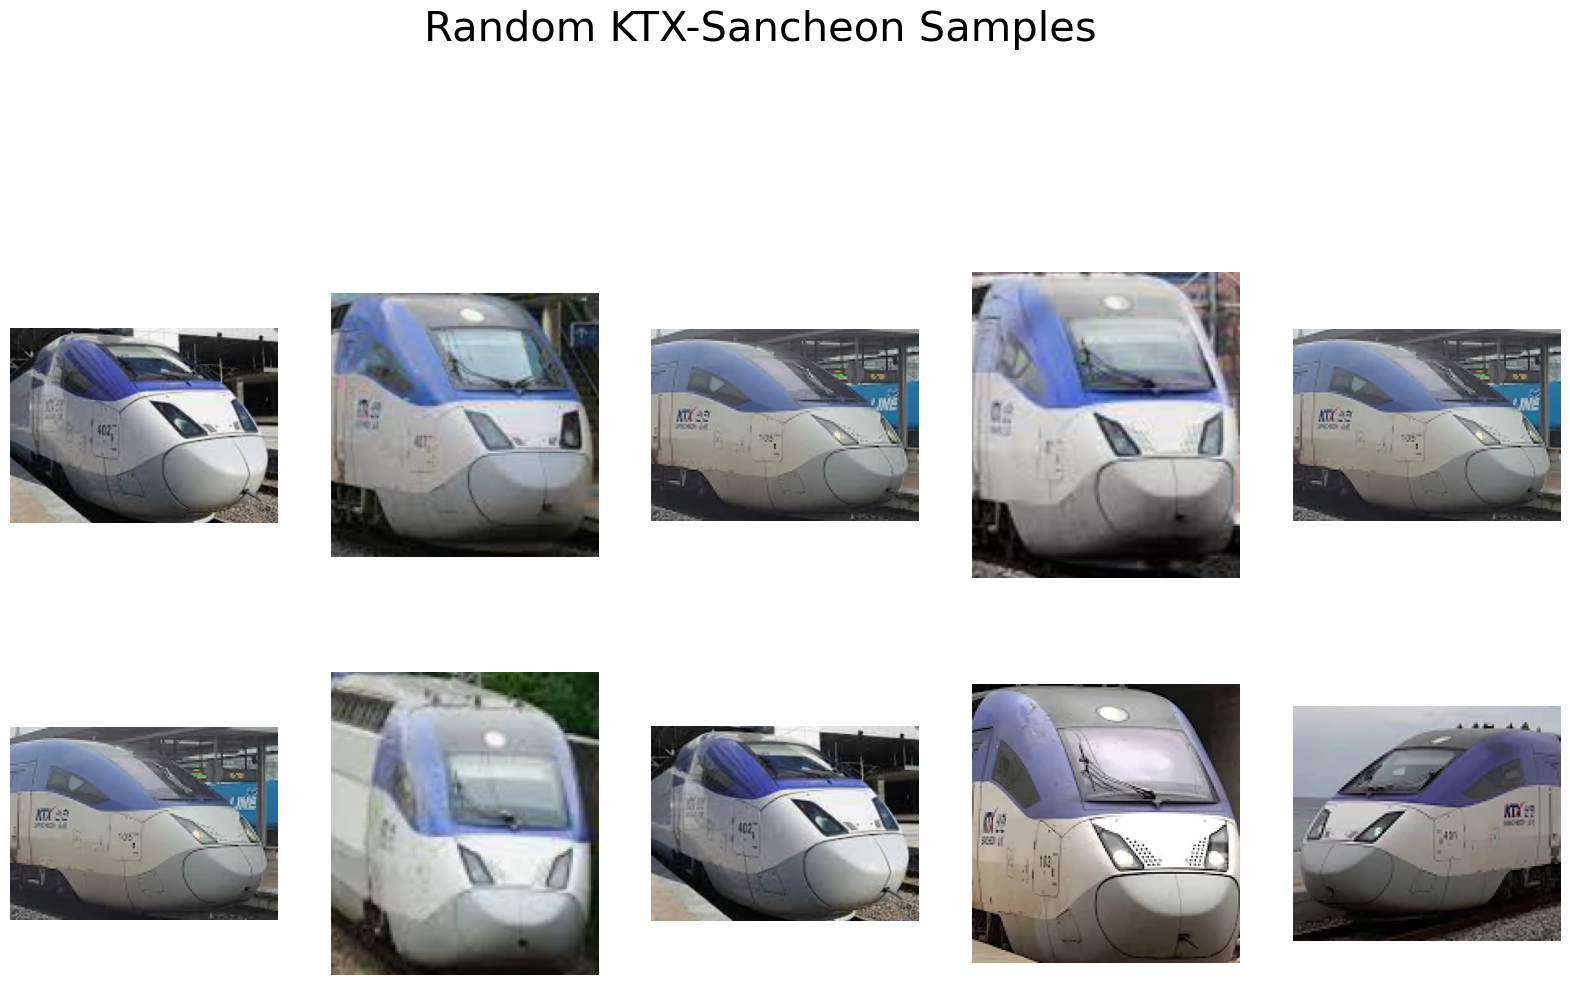

In [10]:
fig,axes = plt.subplots(figsize=(20,25))
  
random_image = [choice(hsr2)for x in range(0,11)]

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    plt.axis(False)
    axes =plt.subplot(5,5,i+1)

fig.delaxes(axes)
fig.suptitle('Random KTX-Sancheon Samples',fontsize=30)

plt.show() 

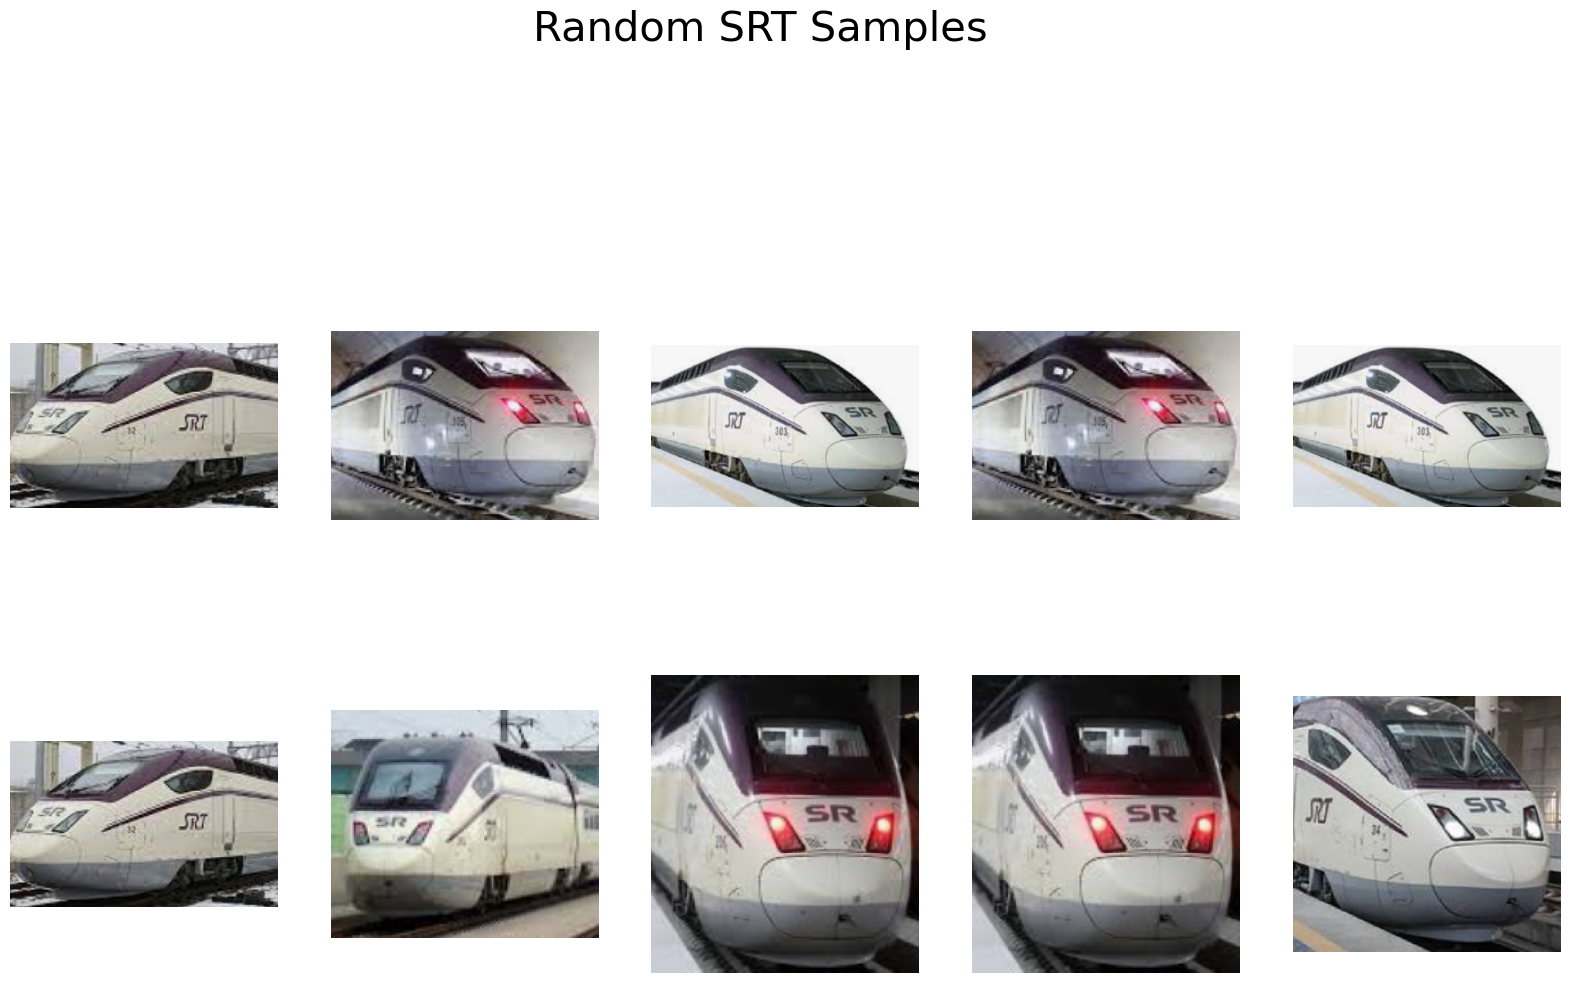

In [11]:
fig,axes = plt.subplots(figsize=(20,25))
  
random_image = [choice(hsr3)for x in range(0,11)] #setting the length of array at 10 to print 10 images

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    axes =plt.subplot(5,5,i+1)
    plt.axis(False)

fig.delaxes(axes)
fig.suptitle('Random SRT Samples',fontsize=30)
plt.axis(False)
plt.show() 

# 3. Create Training and Testing Image Datasets

In [12]:
batch_size = 32 #batch size is a number of samples processed before the model is updated
img_height = 180 #height of our image
img_width = 180 #width of our image
epochs = 20 #number of steps

In [13]:
# Set the path to your training and test dataset directories
train_dir = 'trains'
test_dir = 'tests'

# Define the transformation applied to each image
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor()
])

# Load the training dataset
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=transform
)

# Split the dataset into training and validation sets
validation_split = 0.2
train_size = int((1 - validation_split) * len(train_data))
val_size = len(train_data) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(
    train_data, [train_size, val_size], generator=torch.Generator().manual_seed(123)
)

# Load the test dataset
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=transform
)

# Create data loaders for training, validation, and test sets
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)
test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False
)


# 4. CNN Model Creation

In [14]:
num_classes = 4

class KTX_Classifier(nn.Module):
    def __init__(self):
        super(KTX_Classifier, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.ReLU()
        )
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding='same')
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding='same')
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding='same')
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding='same')
        self.relu4 = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding='same')
        self.relu5 = nn.ReLU()
        self.maxpool5 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * (img_height // (2 ** 5)) * (img_width // (2 ** 5)), 512)
        self.relu6 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.rescaling(x)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.maxpool4(x)
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.maxpool5(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu6(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [15]:
# Set the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train(model, train_loader, criterion, optimizer):
    # Set the model to training mode
    model.train()

    for images, labels in train_loader:
        # Move the data to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    return loss.item()

def test(model, test_loader):
    # Set the model to evaluation mode
    model.eval()

    with torch.no_grad():
        correct = 0
        total = 0

        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Get the predicted labels
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Set the number of epochs
num_epochs = 10

# Define the model
model = KTX_Classifier().to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}")

    # Evaluate on the test set
    test_accuracy = test(model, test_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Test Accuracy: {test_accuracy}%")


Epoch [1/10], Train Loss: 1.3870627880096436
Epoch [1/10], Test Accuracy: 25.0%
Epoch [2/10], Train Loss: 1.3818035125732422
Epoch [2/10], Test Accuracy: 25.0%
Epoch [3/10], Train Loss: 1.3720519542694092
Epoch [3/10], Test Accuracy: 25.0%
Epoch [4/10], Train Loss: 1.3955880403518677
Epoch [4/10], Test Accuracy: 25.0%
Epoch [5/10], Train Loss: 1.3706036806106567
Epoch [5/10], Test Accuracy: 25.0%
Epoch [6/10], Train Loss: 1.3725061416625977
Epoch [6/10], Test Accuracy: 25.0%
Epoch [7/10], Train Loss: 1.3758141994476318
Epoch [7/10], Test Accuracy: 25.0%
Epoch [8/10], Train Loss: 1.3770564794540405
Epoch [8/10], Test Accuracy: 25.0%
Epoch [9/10], Train Loss: 1.377105474472046
Epoch [9/10], Test Accuracy: 25.0%
Epoch [10/10], Train Loss: 1.3764742612838745
Epoch [10/10], Test Accuracy: 25.0%


# 5. Predicting with Given Images

In [21]:
class_names = ['KTX-1','KTX-EUM','KTX-Sancheon','SRT']

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 44ms/step


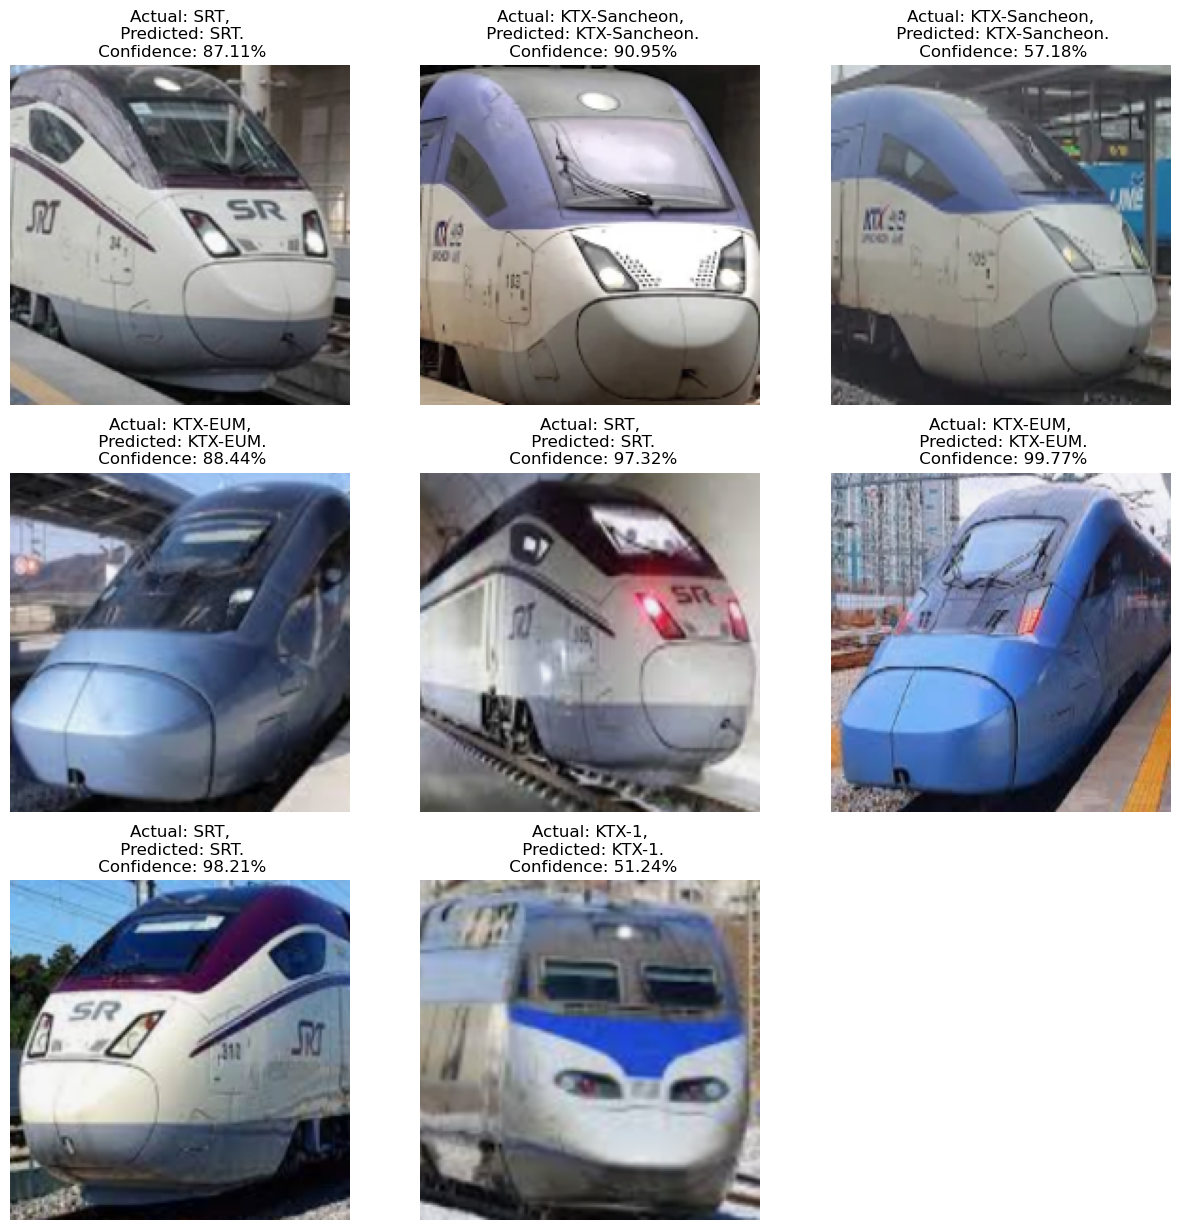

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in val_data.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f'Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%')
        plt.axis('off')